# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

In [75]:
#Szewczyk Marcin, Szot Cyprian, Żurek Bartłomiej

# Zestaw zadań 7: Estymacja nieparametryczna

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

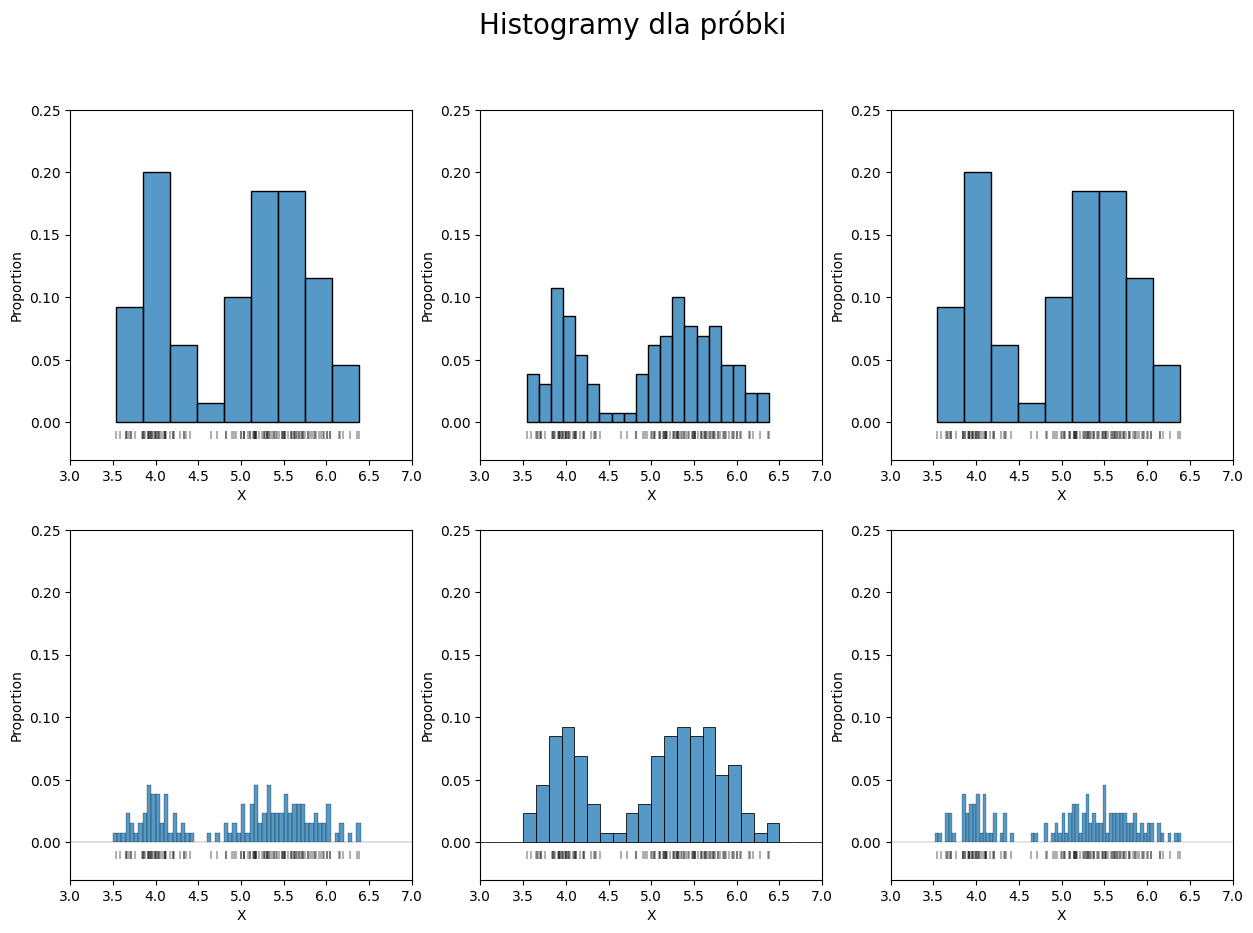

In [76]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Histogramy dla próbki", fontsize=20)
sns.histplot(sample, ax=axes[0,0], x="X", legend=None, stat="proportion")
sns.histplot(sample, ax=axes[0,1], x="X", bins = 20, legend=None, stat="proportion")
sns.histplot(sample, ax=axes[0,2], x="X", binwidth=0.3, legend=None, stat="proportion")
sns.histplot(sample, ax=axes[1,0], x="X", bins=np.arange(2, 8, 0.05), legend=None, stat="proportion")
sns.histplot(sample, ax=axes[1,1], x="X", bins=np.arange(2, 8, 0.15), legend=None, stat="proportion")
sns.histplot(sample, ax=axes[1,2], x="X", bins=np.arange(2, 8, 0.04), legend=None, stat="proportion")
for ax in axes.flatten():
    ax.scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='black', alpha=0.3)
    ax.set_xlim(3, 7)
    ax.set_ylim(-0.03, 0.25)
plt.show()

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [77]:
from scipy.stats import norm
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    pdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    # YOUR CODE HERE
    x_min = data["X"].min() - 3 * sigma
    x_max = data["X"].max() + 3 * sigma
    x_values = np.linspace(x_min, x_max, estimation_points)
    
    kde_values = np.zeros_like(x_values)
    for i, x in enumerate(x_values):
        kde_values[i] = np.sum(norm.pdf(data["X"], x, sigma))
    
    kde_values /= np.sum(kde_values) * (x_values[1] - x_values[0])
    
    pdf = pd.DataFrame({"X": x_values, "KDE": kde_values})
    
    plt.plot(pdf["X"], pdf["KDE"], linewidth=2)
    plt.fill_between(pdf["X"], pdf["KDE"], color="skyblue", alpha=0.4)
    plt.scatter(data["X"], np.full_like(data["X"], -0.02), marker='|', color='black', alpha=0.3)
    plt.xlabel("X")
    plt.ylabel("Gęstość")
    plt.title("Estymacja Funkcją Jądrową")
    plt.show()
    return pdf

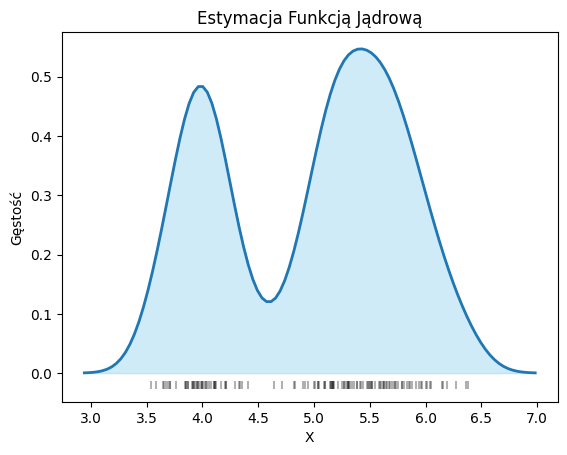

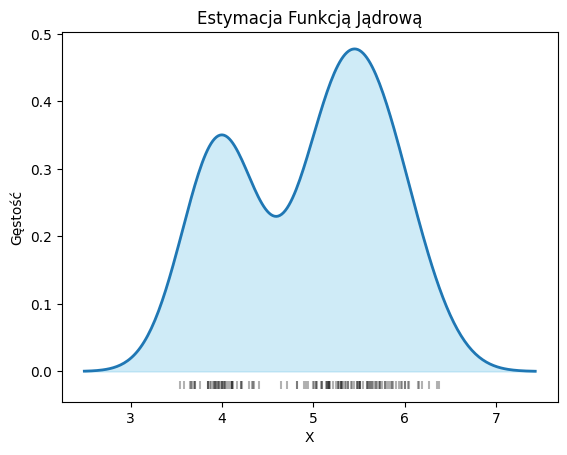

In [78]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

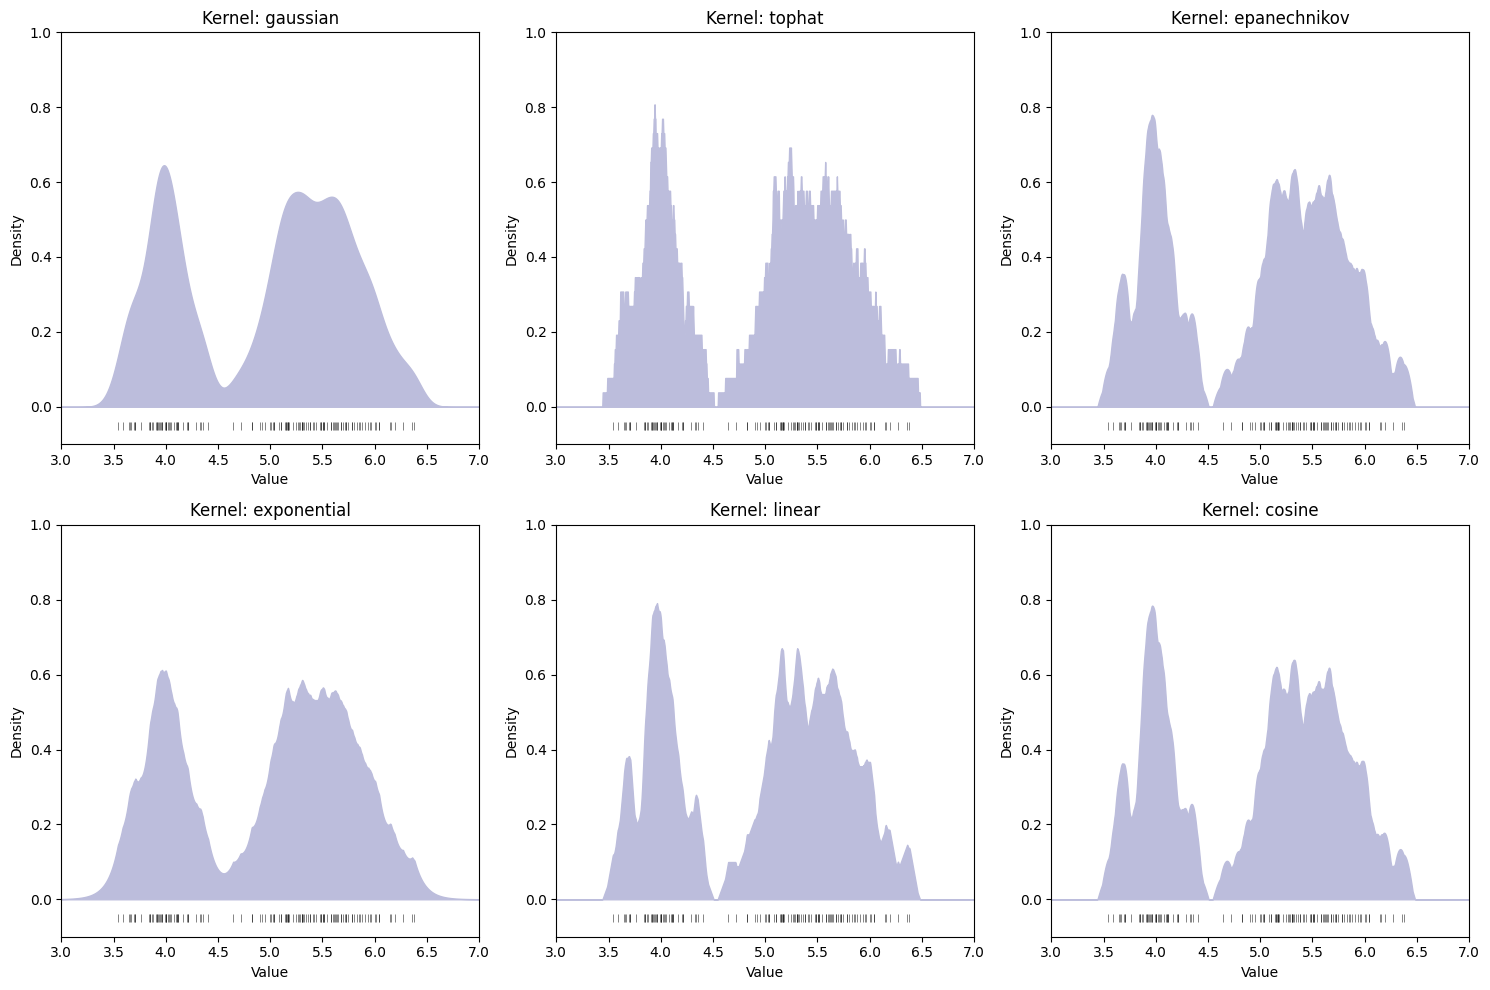

In [79]:
# Figura 1
# YOUR CODE HERE
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

plot_data = pd.DataFrame(np.linspace(3, 7, 1000), columns=["X"])

for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=0.1)
    kde.fit(sample["X"].values[:, None])
    plot_data[kernel] = np.exp(kde.score_samples(plot_data["X"].values[:, None]))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

k = 0
for i in range(2):
    for j in range(3):
        axes[i, j].fill_between(plot_data["X"], plot_data[kernels[k]], color="#bcbddc")
        sns.scatterplot(data=sample, x='X', y=-0.05, marker="|", color="black", ax=axes[i, j], alpha=0.7)
        axes[i, j].set_xlim(3, 7)
        axes[i, j].set_ylim(-0.1, 1)
        axes[i, j].set_title(f'Kernel: {kernels[k]}')
        axes[i, j].set_xlabel("Value")
        axes[i, j].set_ylabel("Density")
        k += 1

plt.tight_layout()
plt.show()

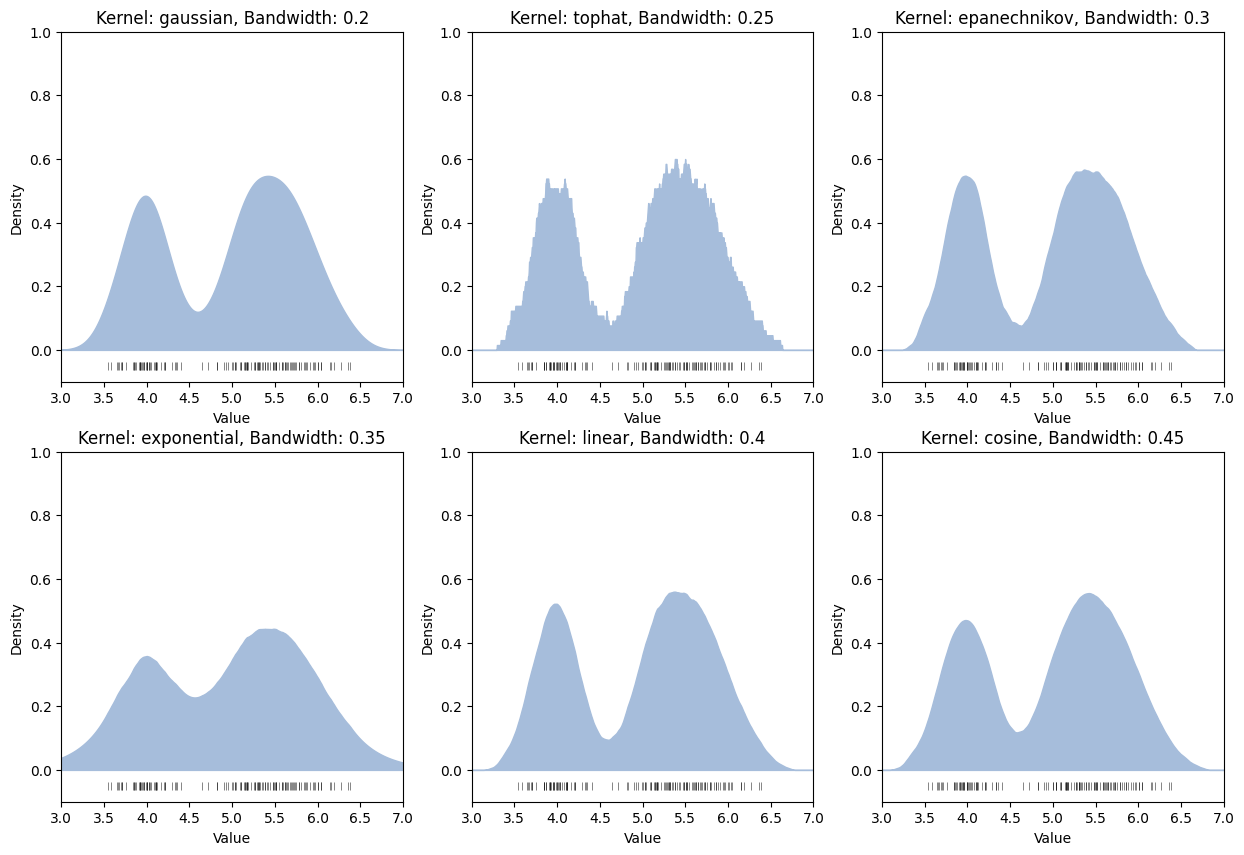

In [80]:
# Figura 2
# YOUR CODE HERE
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidths = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

plot_data = pd.DataFrame(np.linspace(3, 7, 1000), columns = ["X"])
for kernel, bandwidth in zip(kernels, bandwidths):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(sample["X"].values[:,None])
    plot_data[kernel] = np.exp(kde.score_samples(plot_data["X"].values[:,None]))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

k=0
for i in range(2):
    for j in range(3):
        axes[i,j].fill_between(plot_data["X"], plot_data[kernels[k]], color="#a6bddb")
        sns.scatterplot( data = sample, x= 'X', y = -0.05 , marker = "|", color = "black", ax = axes[i, j], alpha=0.7)
        axes[i,j].set_xlim(3,7)
        axes[i,j].set_ylim(-0.1, 1)
        axes[i, j].set_title(f'Kernel: {kernels[k]}, Bandwidth: {bandwidths[k]}')
        axes[i, j].set_xlabel("Value")
        axes[i, j].set_ylabel("Density")
        k += 1
plt.show()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

Plusy figury pierwszej są takie, że gęstość prawdopodobieństwa jest dokładnie oszacowana na podstawie wyliczenia gęstości jądra. Dodatkowo przedstawiwszy wyniki estymacji z wykorzystaniem różnych jąder umożliwia akuratne porównanie z ostatecznym wynikiem. Do minusów można zaliczyć fakt, że niezależnie od wyboru jądra pojawia się dalej stała szerokość, co wpływa na różnorakość "gładkości" wykresów. Z tego powodu są one od siebie różne. Jedne z nich są wyjątkowo poszarpane, co wpłynie na nieczytelność danych i zmusza do ewentualnych zmian.
Do plusów drugiej figury można zaliczyć fakt czytelności tych wykresów. Dla odbiorcy dane pojawiające się na nim mogą zostać odczytane bez większego problemu w porównaniu do figury pierwszej. Jako minus można zaliczyć fakt niedokładności tego wykresu, ponieważ dane na nim są bardziej wygładzone. Prowadzi to do utraty niektórych danych i do tego, że można przeprowadzić błędną analizę na podstawie interpretacji tych danych.

Odpowiedni dobór parametrów i przedziałów może dodatkowo korzystnie wpłynąć na czytelność analizowanych danych. Na przykład im większa szerokość jądra, tym bardziej dane stają się wygładzone na tym wykresie.

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [81]:
from scipy.stats import kstwobign
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    # YOUR CODE HERE
    n = len(sample)
    data_sorted = np.sort(sample["X"])
    D_alpha_n = sp.stats.kstwo.ppf(1-alpha, n)
    F_n = np.arange(1, n + 1) / n
    F_L = np.maximum(0, F_n - D_alpha_n)
    F_U = np.minimum(1, F_n + D_alpha_n)
    
    cdf = pd.DataFrame({
        'X': data_sorted,
        'F_d': F_n,
        'F_d_min': F_L,
        'F_d_max': F_U
    })

    plt.figure(figsize=(10, 6))
    plt.plot(cdf['X'], cdf['F_d'], label='Empirical CDF')
    plt.fill_between(cdf['X'], cdf['F_d_min'], cdf['F_d_max'], alpha=0.15, label=f'Przedział ufności (alpha={alpha})')
    plt.title(f'Przedział ufności dystrybuanty rozkładu na poziomie istotności {1-alpha}')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()
    
    return cdf

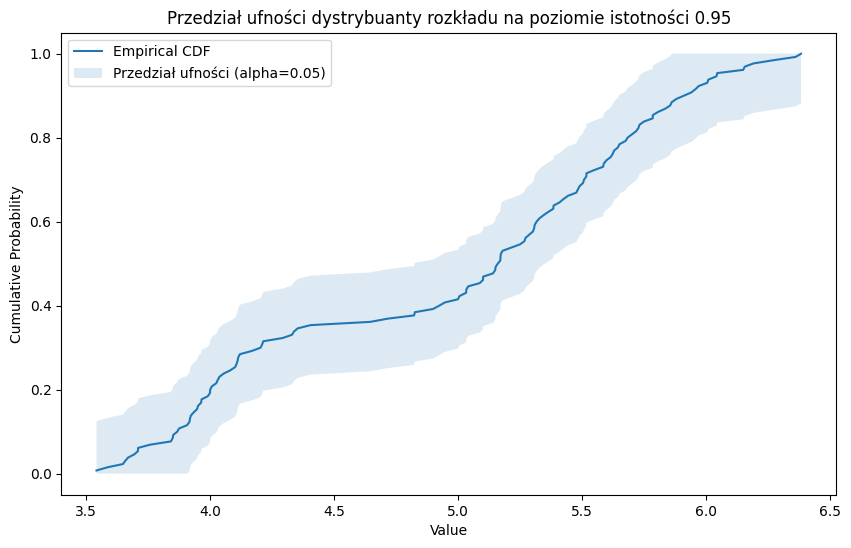

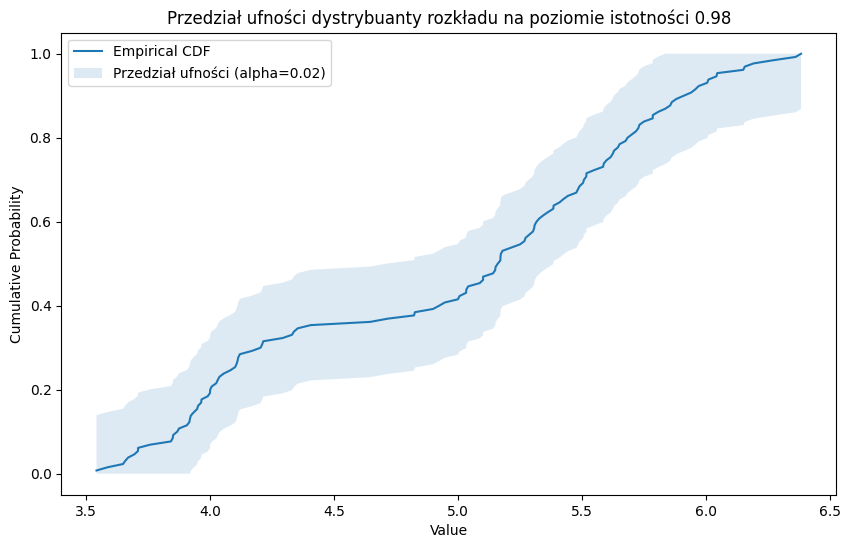

In [82]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))